# AoC 2019 day 11

Today's problem is a __[Langton's ant](https://en.wikipedia.org/wiki/Langton%27s_ant)__, only with a more elaborate internal state (I believe it is called a turmite) and hopefully it terminates :)

Anyhow: the processor from day 9 should work without modification, because inputs are still single digits and it still stops when waiting for new input.

But first, build the robot and try to control it manually, for test purposes. The theatre ("ship's hull") is implemented as a dictionary, that maps a pair of numbers (cell coordinates) into cell state. Cell state may be 0 (painted black)  or 1 (painted white). We actually don't need "unpainted" state, because a cell will be created only in the moment it is painted, thus unpainted cells do not exit in the dictionary, even if the robot stands on one. 

Variables *x* and *y* keep current coordinates of the robot and *dir* its current direction (0 -- up, 1 -- right, 2 -- down, 3 -- left). In agreement with the prevailing convention of AoC problems the *x* axis direction runs right and *y* axis runs down.

In [1]:
step = [(0,-1), (1,0), (0,1), (-1,0)]   # definition of step in a given direction

field = dict()
x = 0
y = 0
dir = 0
moves = [(1,0),(0,0),(1,0),(1,0),(0,1),(1,0),(1,0)]  # preprogrammed test moves

for m in moves:
    field[(x,y)] = m[0]                 # paint cell, creating it if needed
    if m[1]==0 : dir -=1 
    else : dir+=1                       # make turn
    dir = dir % 4
    x += step[dir][0]
    y += step[dir][1]
    
print(field)

{(0, 0): 0, (-1, 0): 0, (-1, 1): 1, (0, 1): 1, (1, 0): 1, (1, -1): 1}


Ok, test satisfactory, so now connect the processor to control the robot and let it dance!

In [2]:
exec(open("../day09/processor.py").read())
program = [int(a) for a in open("input.txt","r").read().split(',')]

step = [(0,-1), (1,0), (0,1), (-1,0)]   # definition of step in a given direction

field = dict()
x = 0
y = 0
dir = 0
proc = processor(program)
col = 0                      # initial color of cell is black

while not(proc.halted):
    m = proc.run(col)
    if m==None : break    # in case the processor halts without output
    field[(x,y)] = m[0]
    if m[1]==0 : dir -=1 
    else : dir+=1            # make turn
    dir = dir % 4
    x += step[dir][0]        # make step           
    y += step[dir][1]
    if (x,y) in field: col = field[(x,y)]
    else: col = 0            # extract color of the current field, black if field is new.
        
print(len(field))

2511


## Part 2

The only change is that initial colour should be 0, not 1, and that we have to print the final field out. First repeat to generate it.

In [3]:
field = dict()
x = 0
y = 0
dir = 0
proc = processor(program)
col = 1                      # initial color of cell is black

while not(proc.halted):
    m = proc.run(col)
    if m==None : break    # in case the processor halts without output
    field[(x,y)] = m[0]
    if m[1]==0 : dir -=1 
    else : dir+=1            # make turn
    dir = dir % 4
    x += step[dir][0]        # make step           
    y += step[dir][1]
    if (x,y) in field: col = field[(x,y)]
    else: col = 0            # extract color of the current field, black if field is new.
        
print(len(field))

249


Find range of x and y

In [4]:
print(min([c[0] for c in field.keys()]))
print(max([c[0] for c in field.keys()]))
print(min([c[1] for c in field.keys()]))
print(max([c[1] for c in field.keys()]))

0
42
0
5


In [5]:
for y in range(6):
    line = ''
    for x in range(43):
        col = field[(x,y)] if (x,y) in field else 0
        if col==0:
            line += ' '                 # Print a "negative", as it should be more readable
        else:
            line += '*'
    print(line)
        

 *  *   ** *  *   ** *  *  **  ***  *  *   
 *  *    * * *     * * *  *  * *  * *  *   
 ****    * **      * **   *    *  * ****   
 *  *    * * *     * * *  * ** ***  *  *   
 *  * *  * * *  *  * * *  *  * *    *  *   
 *  *  **  *  *  **  *  *  *** *    *  *   


Hmmm... Would be nice to plot the solution as I did in R in day 8 solution. How do you plot in Python? Internet says many people do it with maplotlib. 

In [6]:
import matplotlib.pyplot as plt
xpl = list() ; ypl = list()
for f in field.items():
    if f[1] == 1:
        xpl.append(f[0][0])
        ypl.append(5-f[0][1])

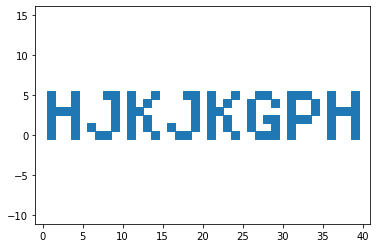

In [7]:
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(xpl,ypl,marker="s",s=70)

Failed to switch frame and axes description, but not bad for a newcomer.